## EE 461P: Data Science Principles  
### Term Project 
### Ensemble Tree Methods (Random Forests, XGBoost, AdaBoost, LightGBM, CatBoost)

# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline

In [2]:
#Load dataset from csv file
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [3]:
label_encoder = LabelEncoder()
# one_hot_encoder = OneHotEncoder()

# df['type_encode'] = one_hot_encoder.fit_transform(df['type']) 
df['nameOrig_encode'] = label_encoder.fit_transform(df['nameOrig']) 
df['nameDest_encode'] = label_encoder.fit_transform(df['nameDest']) 
df.drop(columns=['nameOrig', 'nameDest'], inplace=True)

df = pd.get_dummies(df, prefix_sep="_", columns=['type'])
print(df.head())

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  nameOrig_encode  nameDest_encode  \
0             0.0        0               0           757869          1662094   
1             0.0        0               0          2188998          1733924   
2             0.0        1               0          1002156           439685   
3             0.0        1               0          5828262           391696   
4             0.0        0               0          3445981           828919   

   type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0             0              0      

In [4]:
num_vars = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'nameOrig_encode', 'nameDest_encode']
min_max_scaler = MinMaxScaler()
df[num_vars] = min_max_scaler.fit_transform(df[num_vars])

print(df.head())

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1  0.000106       0.002855        0.003233        0.000000   
1     1  0.000020       0.000357        0.000391        0.000000   
2     1  0.000002       0.000003        0.000000        0.000000   
3     1  0.000002       0.000003        0.000000        0.000059   
4     1  0.000126       0.000697        0.000603        0.000000   

   newbalanceDest  isFraud  isFlaggedFraud  nameOrig_encode  nameDest_encode  \
0             0.0        0               0         0.119287         0.610534   
1             0.0        0               0         0.344545         0.636919   
2             0.0        1               0         0.157738         0.161509   
3             0.0        1               0         0.917359         0.143881   
4             0.0        0               0         0.542392         0.304485   

   type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0             0              0      

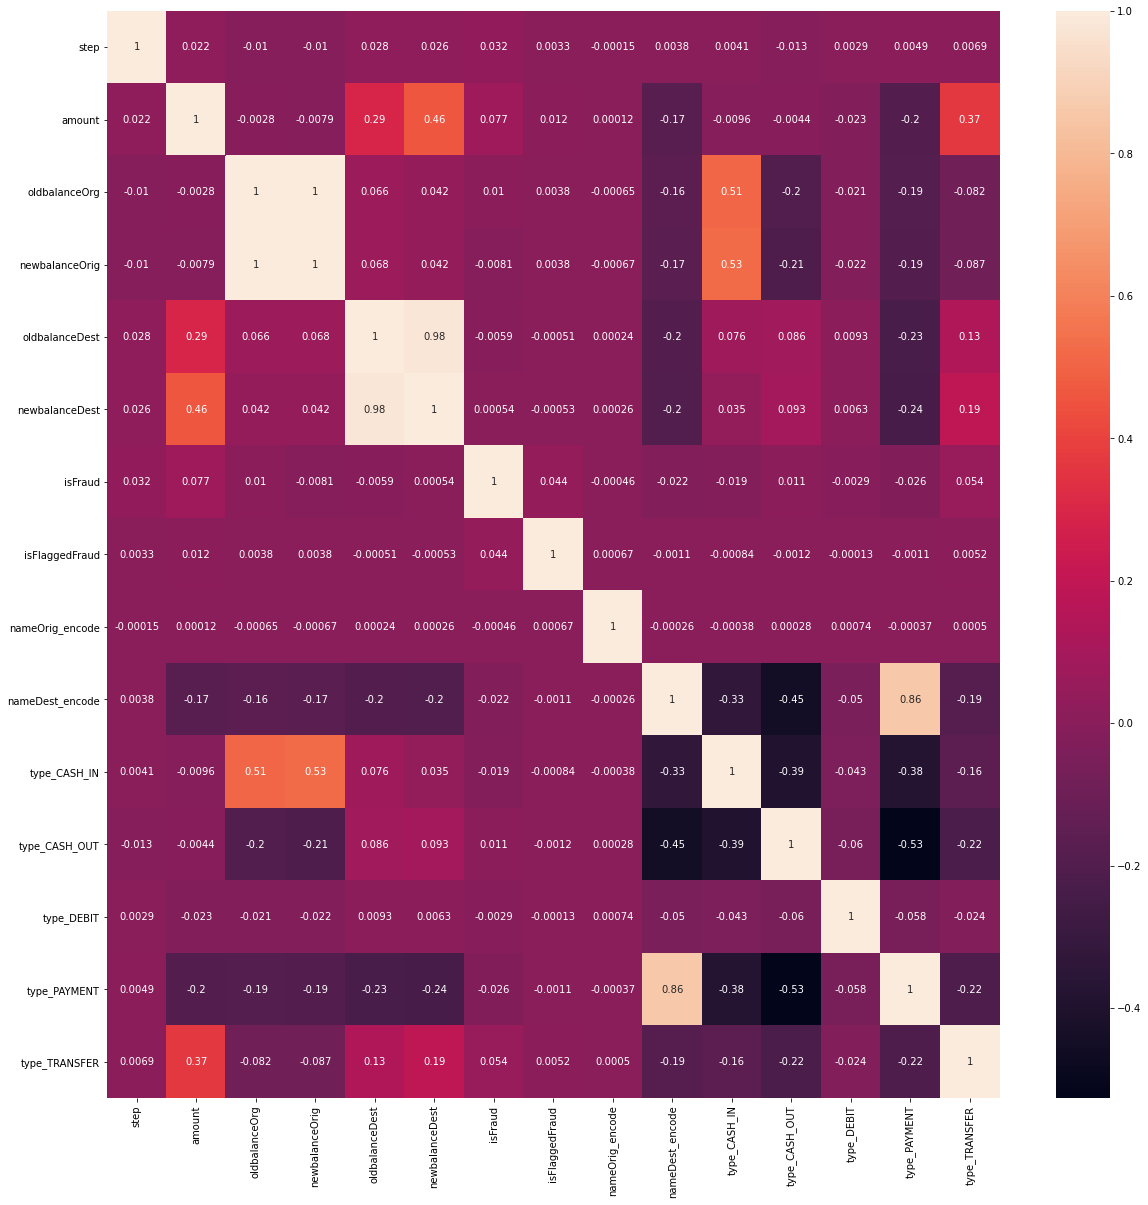

In [5]:
# show covariance matrix
plt.figure(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

In [6]:
X = df.drop('isFraud', 1)
y = df.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
print(X.head())

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1  0.000106       0.002855        0.003233        0.000000   
1     1  0.000020       0.000357        0.000391        0.000000   
2     1  0.000002       0.000003        0.000000        0.000000   
3     1  0.000002       0.000003        0.000000        0.000059   
4     1  0.000126       0.000697        0.000603        0.000000   

   newbalanceDest  isFlaggedFraud  nameOrig_encode  nameDest_encode  \
0             0.0               0         0.119287         0.610534   
1             0.0               0         0.344545         0.636919   
2             0.0               0         0.157738         0.161509   
3             0.0               0         0.917359         0.143881   
4             0.0               0         0.542392         0.304485   

   type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0             0              0           0             1              0  
1             0 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    1.1s finished


Test AUC: 0.9954761200489137


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    1.1s finished


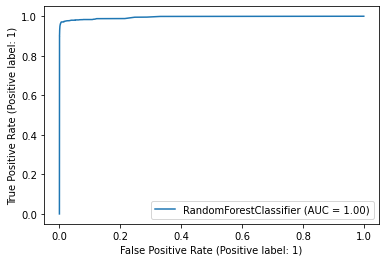

In [7]:
rfc = RandomForestClassifier(n_estimators=50, verbose=1, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)
print(f"Test AUC: {roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])}")
plot_roc_curve(rfc, X_test, y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    1.2s finished


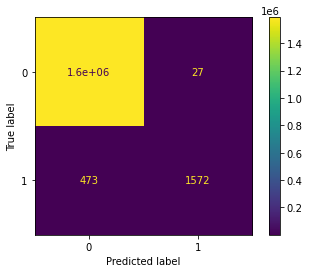

In [8]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show() 

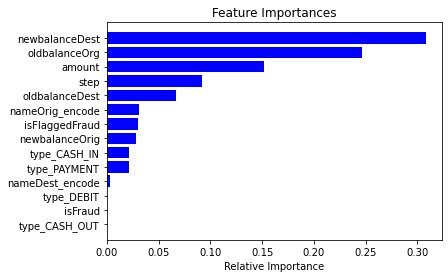

In [9]:
features = df.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   33.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    0.4s finished


Test AUC: 0.9914022221360684


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    0.4s finished


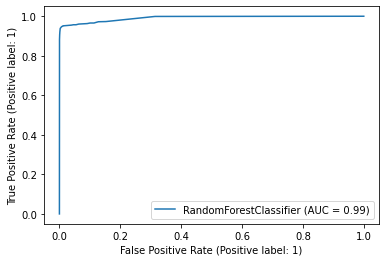

In [10]:
rfc = RandomForestClassifier(n_estimators=15, verbose=1, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)
print(f"Test AUC: {roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])}")
plot_roc_curve(rfc, X_test, y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    0.4s finished


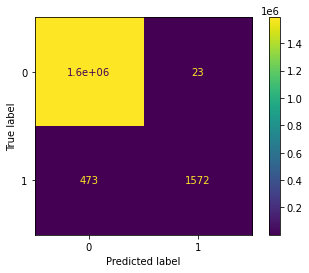

In [11]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

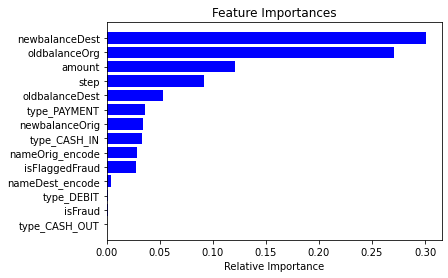

In [12]:
features = df.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [13]:
# y_test.shape
# model that does nothing but guess isFraud = 0
print(f"Test AUC: {roc_auc_score(y_test, np.zeros(y_test.shape[0]))}")

Test AUC: 0.5


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    0.4s finished


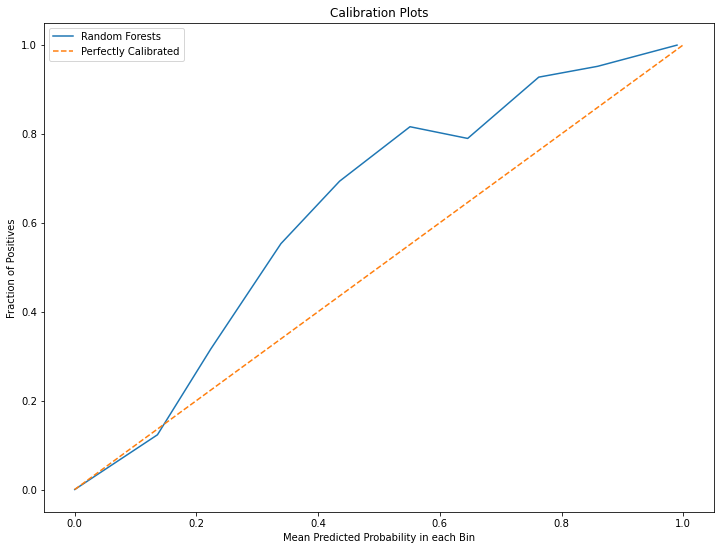

In [14]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(12, 9))

y_pred = rfc.predict_proba(X_test)[:,1]
prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)
plt.plot(prob_pred, prob_true, label="Random Forest Classifier")

# y_pred = lr4_pipeline_v2.predict_proba(X_test)[:,1]
# prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)
# plt.plot(prob_pred, prob_true, label="Improved Logistic Regression")

plt.plot([0, 1], [0, 1], linestyle='--', label="Perfectly Calibrated")

plt.ylabel("Fraction of Positives")
plt.xlabel("Mean Predicted Probability in each Bin")
plt.title("Calibration Plots")
plt.legend()

In [15]:
param_grid = {'n_estimators': [10, 50, 100, 250, 500],
              'criterion': ["gini", "entropy"],
              'max_features': ["auto", "log2"]}

rfc_opt = GridSearchCV(RandomForestClassifier(), param_grid, scoring='roc_auc', n_jobs=-1)
rfc_opt.fit(X_train, y_train)
print(rfc.best_params_)